In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import folium

In [2]:
data = pd.read_csv('../data/processed.csv', index_col=0)
print(data.info())
data.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, (주)서울에너지 직영 to HD현대오일뱅크㈜직영 연세주유소
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상표      443 non-null    object 
 1   자치구     443 non-null    object 
 2   셀프여부    443 non-null    object 
 3   고급휘발유   234 non-null    float64
 4   휘발유     439 non-null    float64
 5   경유      439 non-null    float64
 6   실내등유    138 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.7+ KB
None


,상표,자치구,셀프여부,고급휘발유,휘발유,경유,실내등유
상호,,,,,,,
(주)서울에너지 직영,S-OIL,성동구,Y,NaN,1545.0,1375.0,NaN
정호주유소,자가상표,성동구,N,NaN,1545.0,1374.0,NaN
HD현대오일뱅크㈜직영 성동셀프주유소,현대오일뱅크,성동구,Y,2085.0,1565.0,1395.0,NaN


<Axes: xlabel='셀프여부', ylabel='휘발유'>

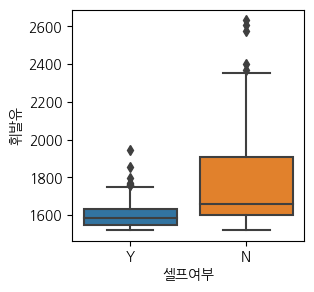

In [3]:
plt.figure(figsize=(3, 3))
sns.boxplot(data, x="셀프여부", y="휘발유")

In [4]:
# pd.pivot_table(data, index="자치구", values=["고급휘발유", "휘발유", "경유", "실내등유"], aggfunc=np.mean) \
#     .sort_values(by="휘발유") \
#     .head(5)

gasoline_data = pd.pivot_table(data, index="자치구", values="휘발유", aggfunc=np.mean)
gasoline_data

,휘발유
자치구,
강남구,1876.787879
강동구,1672.928571
강북구,1549.333333
강서구,1618.181818
관악구,1657.214286
광진구,1587.923077
구로구,1640.450000
금천구,1615.727273
노원구,1591.733333


In [7]:
gasoline_data = pd.pivot_table(data, index="자치구", values="휘발유", aggfunc=np.mean)
geo_data = json.load(open("../data/geo_info.json", encoding="utf-8"))

my_map = folium.Map((37.566535, 126.9779692), scrollWheelZoom=False, tiles="Stamen Toner") \
    .add_to(folium.Figure(300, 300))

folium.Choropleth(
    geo_data=geo_data,
    data=gasoline_data,
    columns=[gasoline_data.index, "휘발유"],
    fill_color="PuRd",
    key_on="feature.id"
).add_to(my_map)

my_map